<h1>라플라시안 필터</h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC5/blob/main/gg-11-라플라시안_필터.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC5/blob/main/gg-11-라플라시안_필터.ipynb"><img src="https://github.com/swkim01/DSAC5/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

시작전에 sdk.png를 코랩 환경의 '/content/sample_data'에 업로드해준다.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   131  100   131    0     0    818      0 --:--:-- --:--:-- --:--:--   818
100 70654  100 70654    0     0   298k      0 --:--:-- --:--:-- --:--:-- 1254k


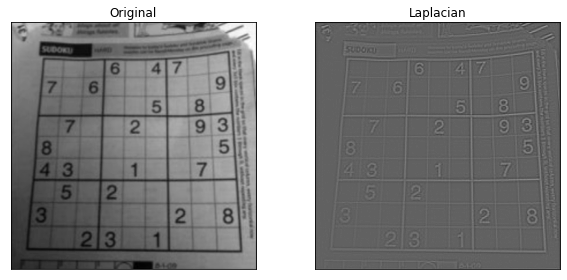

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 읽기
!curl -L https://github.com/swkim01/DSAC5/raw/main/data/sdk.png -o sdk.png
img = cv2.imread('./sdk.png',0)
#img = cv2.imread('/content/sample_data/sdk.png',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)

fig = plt.figure(figsize=(10,10))
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.show()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   131  100   131    0     0    808      0 --:--:-- --:--:-- --:--:--   808
100 70654  100 70654    0     0   296k      0 --:--:-- --:--:-- --:--:--  296k
sigma= 1.7
(382, 379)


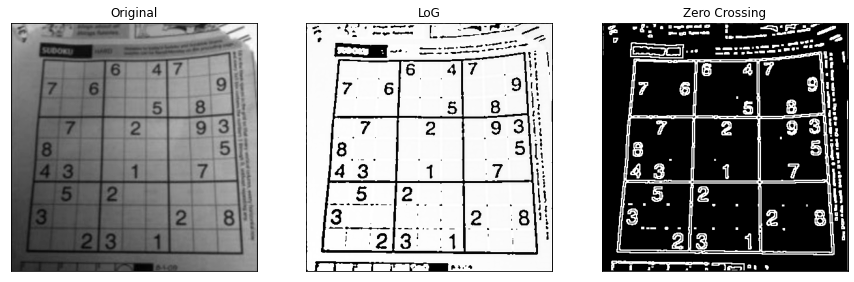

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 이미지 읽기
!curl -L https://github.com/swkim01/DSAC5/raw/main/data/sdk.png -o sdk.png
img = cv2.imread('./sdk.png',0)
#img = cv2.imread('/content/sample_data/sdk.png',0)

ksize = 9
def logFilter():
    global ksize
    k2 = ksize//2
    sigma = 0.3 * (k2-1)+0.8
    print('sigma=',sigma)
    LoG = np.zeros((ksize,ksize),dtype=np.float32)
    for y in range(-k2,k2+1):
        for x in range(-k2,k2+1):
            g = -(x*x+y*y)/(2.0*sigma**2.0)
            LoG[y+k2,x+k2] = -(1.0+g)*np.exp(g)/(np.pi*sigma**4.0)
    return LoG        

def zeroCrossing(lap,thresh=0.01):
    #width,height = lap.shape
    height, width = lap.shape
    Z = np.zeros(lap.shape,dtype=np.uint8)
    for y in range(1,height-1):
        for x in range(1,width-1):
            neighbors = [lap[y-1,x],lap[y+1,x],lap[y,x-1],lap[y,x+1],
            lap[y-1,x-1],lap[y-1,x+1],
            lap[y+1,x-1],lap[y+1,x+1]]
            pos = 0
            neg = 0
            for value in neighbors:
                if value>thresh:
                    pos+=1
                if value<thresh:
                    neg+=1
            if pos > 0 and neg > 0:
                Z[y,x] = 255
    
    return Z

#초기화 작업
kernel = logFilter()
LoG = cv2.filter2D(img,cv2.CV_32F,kernel)
print(LoG.shape)
LoG_img = LoG.astype(np.uint8)
edgeZ = zeroCrossing(LoG)
#laplacian = cv2.Laplacian(img,cv2.CV_64F)

fig = plt.figure(figsize=(15,15))
plt.subplot(2,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,2),plt.imshow(LoG_img,cmap = 'gray')
plt.title('LoG'), plt.xticks([]), plt.yticks([])

plt.subplot(2,3,3),plt.imshow(edgeZ,cmap = 'gray')
plt.title('Zero Crossing'), plt.xticks([]), plt.yticks([])

plt.show()